In [1]:
import os, sys
s3_home =  os.getcwd()
try: sys.path.remove(s3_home)
except Exception: pass
current_dir = os.getcwd()
os.chdir('DATA_PATH') 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import SGD

from sklearn import preprocessing

from matplotlib import pyplot
import datetime

import numpy as np
import scipy

os.chdir(current_dir) 
sys.path.append(s3_home)


2022-09-03 10:40:03.987885: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-03 10:40:03.987938: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<hr>

<br>

In [2]:
dataset = np.loadtxt('./input.txt', delimiter=',')
dataset

array([[-1.11440881e+02, -3.64672855e+01,  3.00000000e+01,
         1.00000000e-02],
       [-8.76129310e+01, -2.36669363e+01,  3.00000000e+01,
         3.50000000e-02],
       [-8.15197821e+01, -2.01477266e+01,  3.00000000e+01,
         6.00000000e-02],
       ...,
       [-1.93148527e+01, -1.36881897e+01,  3.03145447e+01,
         1.53400000e-01],
       [-1.65789782e+01, -1.33898071e+01,  3.03364582e+01,
         1.13900000e-01],
       [-2.01774177e+01, -1.21917423e+01,  4.05743599e+01,
         1.06000000e-01]])

<br>

In [3]:
X = dataset[:, 0:3]
y = dataset[:, 3]

X, y

(array([[-1.11440881e+02, -3.64672855e+01,  3.00000000e+01],
        [-8.76129310e+01, -2.36669363e+01,  3.00000000e+01],
        [-8.15197821e+01, -2.01477266e+01,  3.00000000e+01],
        [-7.83381680e+01, -1.82439517e+01,  3.00000000e+01],
        [-7.62944843e+01, -1.69926284e+01,  3.00000000e+01],
        [-7.48347295e+01, -1.60838488e+01,  3.00000000e+01],
        [-7.37214435e+01, -1.53818334e+01,  3.00000000e+01],
        [-7.28334817e+01, -1.48161135e+01,  3.00000000e+01],
        [-7.21016652e+01, -1.43458828e+01,  3.00000000e+01],
        [-7.14832120e+01, -1.39456095e+01,  3.00000000e+01],
        [-7.09500391e+01, -1.35983659e+01,  3.00000000e+01],
        [-7.04828348e+01, -1.32924097e+01,  3.00000000e+01],
        [-7.00678137e+01, -1.30192944e+01,  3.00000000e+01],
        [-6.96948291e+01, -1.27727596e+01,  3.00000000e+01],
        [-6.93562188e+01, -1.25480485e+01,  3.00000000e+01],
        [-6.90460719e+01, -1.23414705e+01,  3.00000000e+01],
        [-6.87597487e+01

<br>

### <a id='normalisation_sm'></a>Normalisation of input variables

In [4]:
preprocessed_X = preprocessing.minmax_scale(X, feature_range=(0, 1))
preprocessed_X

array([[0.00255986, 0.00343881, 0.        ],
       [0.25302696, 0.34440281, 0.        ],
       [0.31707499, 0.4381443 , 0.        ],
       [0.35051847, 0.48885532, 0.        ],
       [0.37200062, 0.52218692, 0.        ],
       [0.38734481, 0.54639416, 0.        ],
       [0.39904709, 0.56509381, 0.        ],
       [0.40838089, 0.58016293, 0.        ],
       [0.41607337, 0.59268851, 0.        ],
       [0.42257423, 0.60335062, 0.        ],
       [0.42817866, 0.61260018, 0.        ],
       [0.43308967, 0.62074996, 0.        ],
       [0.43745216, 0.62802496, 0.        ],
       [0.44137278, 0.63459193, 0.        ],
       [0.44493208, 0.64057758, 0.        ],
       [0.44819218, 0.64608021, 0.        ],
       [0.45120187, 0.6511774 , 0.        ],
       [0.45399992, 0.65593113, 0.        ],
       [0.45661742, 0.66039124, 0.        ],
       [0.45907924, 0.66459774, 0.        ],
       [0.46140493, 0.66858207, 0.        ],
       [0.46360917, 0.67236773, 0.        ],
       [0.

<br>

In [5]:
iem_samples = dataset.shape[0]-4
iem_samples


264

In [6]:
test_X_S1 = preprocessed_X[iem_samples:]
preprocessed_X_iem = preprocessed_X[:iem_samples]

test_y_S1 = y[iem_samples:]
y_iem = y[:iem_samples]

<br>

In [7]:
s = np.arange(iem_samples)
np.random.shuffle(s)
preprocessed_X_shuffled = preprocessed_X_iem[s]
y_shuffled = y_iem[s]

<br>

### <a id='split_2'></a>Split training data into training and test data 

In [8]:
n_train_perc = 0.7
n_train = round(preprocessed_X_shuffled.shape[0] * n_train_perc)
n_train

185

In [9]:
train_X  = preprocessed_X_shuffled[:n_train, :]
train_y  = y_shuffled[:n_train] 

test_X = preprocessed_X_shuffled[n_train:, :]
test_y = y_shuffled[n_train:]

n_train, train_X, test_X

(185,
 array([[0.68932842, 0.90027816, 0.18913674],
        [0.7458518 , 0.98217952, 0.        ],
        [0.39636602, 0.56341777, 0.18913674],
        [0.74948549, 0.9928775 , 0.18913674],
        [0.71108078, 0.92731812, 0.18913674],
        [0.64536532, 0.82271577, 0.        ],
        [0.6634962 , 0.85679125, 0.18913674],
        [0.59579103, 0.79383849, 0.18913674],
        [0.46304185, 0.67562332, 0.18913674],
        [0.58108081, 0.76531075, 0.        ],
        [0.45394903, 0.65981568, 0.18913674],
        [0.70831361, 0.93315496, 0.18913674],
        [0.23799831, 0.2515075 , 0.18913674],
        [0.66516279, 0.85481434, 0.        ],
        [0.31707499, 0.4381443 , 0.        ],
        [0.63436591, 0.80933768, 0.18913674],
        [0.47640389, 0.69916222, 0.18913674],
        [0.69894579, 0.91683223, 0.18913674],
        [0.39904709, 0.56509381, 0.        ],
        [0.57338841, 0.75283595, 0.        ],
        [0.27708345, 0.31164312, 0.        ],
        [0.70831124, 0.92735

<br>

sequential neural network model with `keras.Sequential()`.

In [10]:
model = keras.Sequential()

2022-09-03 10:40:06.919448: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-03 10:40:06.919777: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-03 10:40:06.919948: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-09-03 10:40:06.920065: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-09-03 10:40:06.920169: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [11]:
# Layer 1
model.add(Dense(8, input_dim=3))
model.add(LeakyReLU(alpha=0.1))

# Layer 2
model.add(Dense(3))
model.add(LeakyReLU(alpha=0.1))

# Layer 3
model.add(Dense(1, activation='sigmoid'))

<br>

In [12]:
model.compile(loss='mean_absolute_error', 
              optimizer=SGD(lr=0.01, momentum=0.9), 
              metrics=['mse'])

/home/ozlem/anaconda3/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


<br>

## <a id='sequential_fitting'></a>Training (Fitting) of the sequential model



In [13]:
log_dir = "DATA_PATH/logs/fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

<br>

In [14]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

<br>

In [15]:
mc = keras.callbacks.ModelCheckpoint('DATA_PATH/best_oz.h5', monitor='val_mse', mode='min', verbose=1, save_best_only=True)

<br>

In [16]:
history = model.fit(train_X, train_y, 
                    validation_data=(test_X, test_y), 
                    epochs=100, 
                    batch_size=10,
                    callbacks=[tensorboard_callback, es, mc])
#history

Epoch 1/100
 1/19 [>.............................] - ETA: 7s - loss: 0.2144 - mse: 0.0789
Epoch 1: val_mse improved from inf to 0.07195, saving model to /home/ozlem/WEkEO/SM_WEKEO/best_oz.h5
19/19 [==============================] - 1s 15ms/step - loss: 0.2103 - mse: 0.0635 - val_loss: 0.2319 - val_mse: 0.0719
Epoch 2/100
19/19 [==============================] - ETA: 0s - loss: 0.2048 - mse: 0.0570
Epoch 2: val_mse improved from 0.07195 to 0.06544, saving model to /home/ozlem/WEkEO/SM_WEKEO/best_oz.h5
19/19 [==============================] - 0s 8ms/step - loss: 0.2048 - mse: 0.0570 - val_loss: 0.2217 - val_mse: 0.0654
Epoch 3/100
18/19 [===========================>..] - ETA: 0s - loss: 0.2052 - mse: 0.0562
Epoch 3: val_mse improved from 0.06544 to 0.06407, saving model to /home/ozlem/WEkEO/SM_WEKEO/best_oz.h5
19/19 [==============================] - 0s 8ms/step - loss: 0.2021 - mse: 0.0551 - val_loss: 0.2196 - val_mse: 0.0641
Epoch 4/100
14/19 [=====================>........] - ETA: 0s 

<br>

## <a id='model_evaluation'></a> Evaluate model performance

In [17]:
model = keras.models.load_model('./best_oz.h5')
model

<br>

In [18]:
_, test_mse = model.evaluate(test_X, test_y)

print('Mse: %.4f' % test_mse)

3/3 [==============================] - 0s 3ms/step - loss: 0.1837 - mse: 0.0476
Mse: 0.0476


<br>

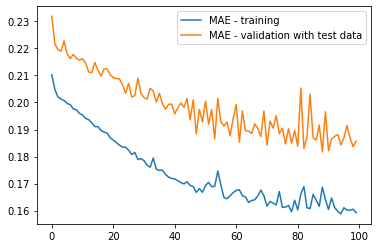

In [19]:
pyplot.plot(history.history['loss'], label='MAE - training')
pyplot.plot(history.history['val_loss'], label='MAE - validation with test data')
pyplot.legend()

<br>

## <a id='soil_moisture_prediction'></a>Predicting soil moisture with the trained sequential neural network

In [20]:
predicted = []
for index, value in enumerate(test_X_S1):
    pred = np.expand_dims(value, axis=0)
    predicted.append(model.predict(pred))
    
    print("Input values: " + str(value) + ",  Output soil moisture: " + str(test_y_S1[index]))
    print("Predicted soil moisture: " + str(model.predict(pred)) + "\n ")


1/1 [==============================] - 0s 74ms/step
Input values: [1.         0.78706989 0.02841644],  Output soil moisture: 0.0848
1/1 [==============================] - 0s 17ms/step
Predicted soil moisture: [[0.44284764]]
 
1/1 [==============================] - 0s 17ms/step
Input values: [0.97094106 0.61020754 0.02974598],  Output soil moisture: 0.1534
1/1 [==============================] - 0s 18ms/step
Predicted soil moisture: [[0.27495912]]
 
1/1 [==============================] - 0s 17ms/step
Input values: [0.99969916 0.61815558 0.0318183 ],  Output soil moisture: 0.1139
1/1 [==============================] - 0s 20ms/step
Predicted soil moisture: [[0.28494716]]
 
1/1 [==============================] - 0s 17ms/step
Input values: [0.96187422 0.65006854 1.        ],  Output soil moisture: 0.106
1/1 [==============================] - 0s 21ms/step
Predicted soil moisture: [[0.15074871]]
 


<br>

## <a id='evaluate_soil_moisutre_pred'></a> Evaluate model predictions

Text(0, 0.5, 'Predicted')

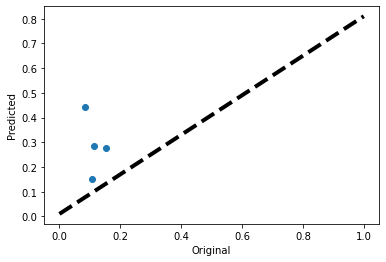

In [21]:
fig, ax = pyplot.subplots()
ax.scatter(test_y_S1, predicted)
ax.plot([test_y.min(), test_y.max()], 'k--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')

<br>

In [22]:
test_y_nparray = np.array(test_y_S1)
test_y_flattened = test_y_nparray.flatten()
predicted_nparray = np.array(predicted)
predicted_flattened = predicted_nparray.flatten()

corr, _ = scipy.stats.pearsonr(test_y_flattened, predicted_flattened)
print('Pearson correlation: %.3f' % corr)

Pearson correlation: -0.382


<br>